In [5]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import util
import time

In [2]:
ROOT_FOLDER = util.ROOT_FOLDER

filenames, datamap = util.initial_setup()

In [3]:
def get_full_path(row):
    return os.path.join(ROOT_FOLDER, row)

datamap['Full Path'] = datamap['File Name'].apply(lambda x: get_full_path(x))

In [4]:
datamap.head()

,File Name,Class,label,PhotoIncluded,Full Path
0,ESP_013049_0950_RED-0067.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...
1,ESP_013049_0950_RED-0067-fv.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...
2,ESP_013049_0950_RED-0067-brt.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...
3,ESP_013049_0950_RED-0067-r90.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...
4,ESP_013049_0950_RED-0067-r180.jpg,7,train,0,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...


In [5]:
datamap_reduced = datamap[datamap["PhotoIncluded"]==1].copy()
print(datamap.shape, datamap_reduced.shape)

(67810, 5) (33630, 5)


In [6]:
tmp = util.get_image_data(datamap.loc[0]['Full Path'], True)
tmp

<class 'numpy.ndarray'>
(227, 227)


array([[198, 195, 192, ..., 169, 170, 171],
       [193, 192, 193, ..., 181, 178, 176],
       [179, 184, 193, ..., 199, 194, 190],
       ...,
       [190, 189, 185, ...,   0,   0,   0],
       [191, 189, 186, ...,   0,   0,   0],
       [191, 190, 186, ...,   0,   0,   0]], dtype=uint8)

In [7]:
datamap.loc[0]['Full Path']

'C:\\Users\\cdcro\\Documents\\GT\\Project\\Mars\\hirise-map-proj-v3_2\\hirise-map-proj-v3_2\\map-proj-v3_2\\ESP_013049_0950_RED-0067.jpg'

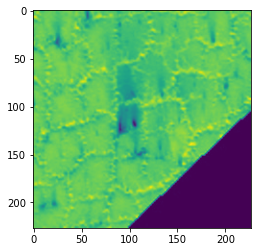

In [8]:
util.show_image(tmp)

In [9]:
tmp.shape

(227, 227)

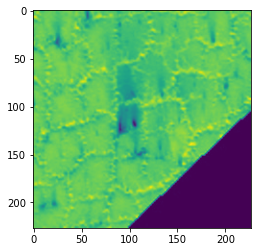

In [10]:
util.show_image(tmp.reshape(1,tmp.shape[0]*tmp.shape[1]).reshape(227,227))

In [11]:
def df_get_image_data(row):
    # H W D
    raw_data = util.get_image_data(row)
    return raw_data

datamap_reduced['Raw Data'] = datamap_reduced['Full Path'].apply(lambda x: df_get_image_data(x))

In [80]:
def df_image_shape(row):
    return row.shape

def df_flatten_arr(row):
    return row.reshape(1,227*227)[0].T

datamap_reduced['Shape'] = datamap_reduced['Raw Data'].apply(lambda x: df_image_shape(x))
datamap_reduced['flattened_arr'] = datamap_reduced['Raw Data'].apply(lambda x: df_flatten_arr(x))


In [81]:
datamap_reduced

,File Name,Class,label,PhotoIncluded,Full Path,Raw Data,Shape,flattened_arr
0,ESP_013049_0950_RED-0067.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[198, 195, 192, 195, 202, 198, 184, 171, 166,...","(227, 227)","[198, 195, 192, 195, 202, 198, 184, 171, 166, ..."
1,ESP_013049_0950_RED-0067-fv.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[191, 190, 187, 185, 186, 186, 184, 184, 184,...","(227, 227)","[191, 190, 187, 185, 186, 186, 184, 184, 184, ..."
2,ESP_013049_0950_RED-0067-brt.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[223, 222, 218, 220, 226, 223, 213, 208, 202,...","(227, 227)","[223, 222, 218, 220, 226, 223, 213, 208, 202, ..."
3,ESP_013049_0950_RED-0067-r90.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[192, 190, 190, 189, 187, 185, 184, 185, 189,...","(227, 227)","[192, 190, 190, 189, 187, 185, 184, 185, 189, ..."
5,ESP_013049_0950_RED-0067-r270.jpg,7,train,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[170, 177, 189, 199, 206, 201, 185, 175, 173,...","(227, 227)","[170, 177, 189, 199, 206, 201, 185, 175, 173, ..."
...,...,...,...,...,...,...,...,...
67802,ESP_018707_2205_RED-0034.jpg,0,test,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","(227, 227)","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67803,ESP_018707_2205_RED-0019.jpg,0,test,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[99, 104, 108, 105, 122, 159, 152, 125, 87, 8...","(227, 227)","[99, 104, 108, 105, 122, 159, 152, 125, 87, 86..."
67804,ESP_018707_2205_RED-0032.jpg,0,test,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[117, 118, 121, 117, 94, 68, 70, 92, 117, 137...","(227, 227)","[117, 118, 121, 117, 94, 68, 70, 92, 117, 137,..."
67805,ESP_018707_2205_RED-0041.jpg,0,test,1,C:\Users\cdcro\Documents\GT\Project\Mars\hiris...,"[[161, 144, 107, 83, 89, 102, 110, 119, 133, 1...","(227, 227)","[161, 144, 107, 83, 89, 102, 110, 119, 133, 14..."


In [48]:
arr = datamap_reduced['flattened_arr'].to_numpy()
cl = datamap_reduced['Class'].to_numpy()

In [50]:
arr = np.concatenate(arr, axis=0).reshape(33630,51529)

In [71]:
arr.shape

(33630, 51529)

In [68]:
option_a = np.column_stack((cl, arr))

In [70]:
option_a.shape

(33630, 51530)

In [82]:
option_a[:,1:]

array([[198, 195, 192, ...,   0,   0,   0],
       [198, 195, 192, ...,   0,   0,   0],
       [198, 195, 192, ...,   0,   0,   0],
       ...,
       [198, 195, 192, ...,   0,   0,   0],
       [198, 195, 192, ...,   0,   0,   0],
       [198, 195, 192, ...,   0,   0,   0]], dtype=int64)

In [55]:
B = np.array([[2,2,2],[3,3,3],[4,4,4]])
A = np.array([1,5,9])

In [73]:
option_a[0]

array([  7, 198, 195, ...,   0,   0,   0], dtype=int64)

In [76]:
option_a[0][0:-1].reshape(227,227)

array([[  7, 198, 195, ..., 169, 169, 170],
       [171, 193, 192, ..., 180, 181, 178],
       [176, 179, 184, ..., 198, 199, 194],
       ...,
       [  0, 190, 189, ...,   0,   0,   0],
       [  0, 191, 189, ...,   0,   0,   0],
       [  0, 191, 190, ...,   0,   0,   0]], dtype=int64)

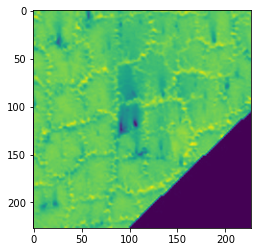

In [79]:
# Recreate the image from the array
util.show_image(option_a[0][0:-1].reshape(227,227))

In [78]:
np.column_stack((A,B)).shape

(3, 4)

In [23]:
def data_setup(datamap, reduce=True, img_reduction=None):
    df = datamap.copy()
    
    def get_full_path(row):
        return os.path.join(ROOT_FOLDER, row)
    
    def df_get_image_data(row, img_reduction):
        # H W D
        raw_data = util.get_image_data(row, reduction=img_reduction)
        return raw_data
    
    def df_image_shape(row):
        return row.shape

    def df_flatten_arr(row):
        return row.reshape(1,(227-img_reduction[0])*(227-img_reduction[1]))[0].T
    
    df['Full Path'] = df['File Name'].apply(lambda x: get_full_path(x))
    
    if reduce:
        df = df[datamap["PhotoIncluded"]==1].copy()
        
    df['Raw Data'] = df['Full Path'].apply(lambda x: df_get_image_data(x, img_reduction))
    df['Shape'] = df['Raw Data'].apply(lambda x: df_image_shape(x))
    df['flattened_arr'] = df['Raw Data'].apply(lambda x: df_flatten_arr(x))
    
    return df

def get_picture_array(pic_data, extra_labels):
    return np.column_stack((extra_labels, pic_data))

In [7]:
ROOT_FOLDER = util.ROOT_FOLDER

filenames, datamap = util.initial_setup()

datamap = util.data_setup(datamap, reduce=True)

In [15]:
datamap['flattened_arr'].iloc[0].shape

(51529,)

In [24]:
ROOT_FOLDER = util.ROOT_FOLDER

filenames, datamap_b = util.initial_setup()

In [25]:


datamap_b = data_setup(datamap_b, reduce=True, img_reduction=(2,2))

In [26]:
datamap_b['flattened_arr'].iloc[0].shape

(50625,)